# COMPARATIVO: NGBoost vs LightGBM para Classificação Binária

* Este notebook compara os modelos **LightGBM** e **NGBoost** usando o dataset de inadimplência de cartões de crédito. O objetivo principal é entender com o algoritmo NGBoost trabalha e compará-lo à outro tradicional.
  
* Link do dataset: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## DADOS

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## TREINO E TESTE

In [5]:
y = df['default.payment.next.month']
X = df.drop(columns=['ID', 'default.payment.next.month'])

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## LIGHTGBM

**LightGBM (Light Gradient Boosting Machine)** é um algoritmo de gradient boosting desenvolvido pela Microsoft, projetado para ser rápido, eficiente e preciso, especialmente com grandes volumes de dados.

1. Princípios básicos:
Gradient Boosting: Ele constrói o modelo em estágios sucessivos, onde cada novo modelo tenta corrigir os erros do anterior.

2. Modelos base: Utiliza árvores de decisão como modelos fracos.

3. Objetivo: Minimizar uma função de perda (como log-loss) usando gradientes da função de custo — daí o nome "boosting por gradiente".

4. O que torna o LightGBM especial?
Crescimento da árvore por folha (leaf-wise)

5. Ao contrário do XGBoost, que cresce as árvores nível por nível (depth-wise), o LightGBM cresce as árvores priorizando as folhas com maior perda. Isso tende a gerar modelos mais profundos e precisos, mas que podem **overfitar** se não forem bem regulados.

6. Os valores contínuos são convertidos em bins discretos (histogramas), o que reduz o uso de memória e acelera o treinamento.

7. Trata bem dados com muitos valores ausentes (NaN) ou zeros (comum em crédito/fraude).

8. Alta performance com grandes datasets

9. Otimizado para velocidade, podendo treinar milhões de registros com dezenas de features em poucos segundos.

In [6]:
%%time
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4645, number of negative: 16355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221190 -> initscore=-1.258742
[LightGBM] [Info] Start training from score -1.258742
CPU times: total: 1.95 s
Wall time: 666 ms


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [8]:
%%time
y_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]
roc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
print('ROC AUC - LightGBM:', roc_lgbm)

ROC AUC - LightGBM: 0.7766093805345627
CPU times: total: 125 ms
Wall time: 42.3 ms


## NGBOOST

**NGBoost (Natural Gradient Boosting)** é um algoritmo de gradient boosting probabilístico, ou seja, ele não apenas prediz um valor (ou probabilidade), mas uma distribuição completa para a variável de interesse. Ele foi projetado para modelar incertezas de forma explícita.

1. Princípios básicos: Baseia-se no Gradient Boosting, como o LightGBM e o XGBoost. Mas ao invés de prever apenas um número, ele prevê os parâmetros de uma distribuição estatística (ex: média e desvio padrão da distribuição normal).

2. Usa o conceito de gradiente natural, que é mais estável e adequado para ajustar distribuições probabilísticas.

3. Como ele aprende: Escolhe uma distribuição alvo, como Normal (média e variância), Bernoulli (para classificação binária), Exponencial, Poisson etc.

4. Cada estágio do boosting ajusta os parâmetros da distribuição, e não só a média. Por exemplo, em vez de prever "12% de inadimplência", ele pode prever: Média = 12%, Incerteza (desvio padrão) = 5%

5. Minimiza a perda da verossimilhança negativa (Negative Log-Likelihood), que mede o quão boa é a distribuição predita comparada aos dados reais.

In [9]:
%%time
ngb = NGBClassifier(Dist=Bernoulli, verbose=False, random_state=42)
ngb.fit(X_train, y_train)

CPU times: total: 2min 1s
Wall time: 2min 1s


,Dist,<class 'ngboo....Categorical'>
,Score,<class 'ngboo...res.LogScore'>
,Base,"DecisionTreeR..., max_depth=3)"
,natural_gradient,True
,n_estimators,500
,learning_rate,0.01
,minibatch_frac,1.0
,col_sample,1.0
,verbose,False
,random_state,RandomState(M... 0x18C8C48D840
,validation_fraction,0.1


In [10]:
%%time
y_proba_ngb = ngb.predict_proba(X_test)[:, 1]
roc_ngb = roc_auc_score(y_test, y_proba_ngb)
print('ROC AUC - NGBoost:', roc_ngb)

ROC AUC - NGBoost: 0.7771222821142852
CPU times: total: 1.16 s
Wall time: 1.1 s


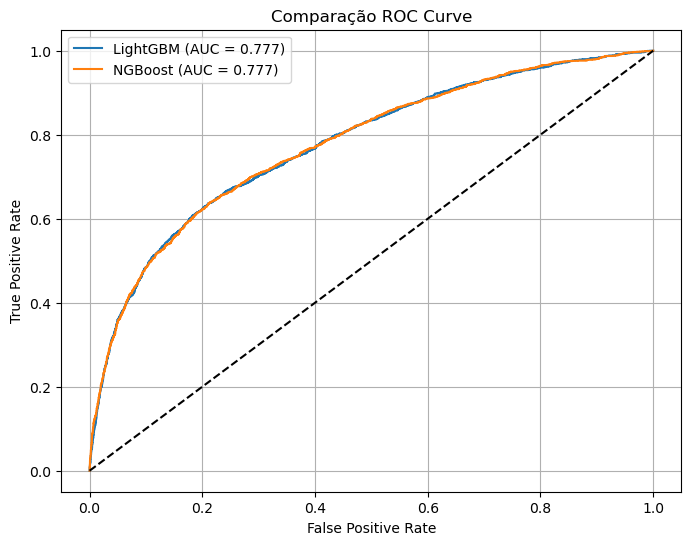

In [11]:
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_proba_lgbm)
fpr_ngb, tpr_ngb, _ = roc_curve(y_test, y_proba_ngb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_lgbm:.3f})')
plt.plot(fpr_ngb, tpr_ngb, label=f'NGBoost (AUC = {roc_ngb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparação ROC Curve')
plt.legend()
plt.grid()
plt.show()

## QUEBRANDO EM FAIXAS:

CRIANDO GRUPOS (DECIS) PARA SEGMENTAR OS MELHORES CLIENTES

In [12]:
def gerar_tabela_decisao(y_true, y_proba, n_bins=10):
    df = pd.DataFrame({'y_true': y_true, 'score': y_proba})
    df['faixa'] = pd.qcut(df['score'], q=n_bins, duplicates='drop', labels=False)
    df['faixa'] = (n_bins - 1) - df['faixa']  # Faixa 0 = maiores scores

    resumo = df.groupby('faixa').apply(lambda g: pd.Series({
        'quantidade': len(g),
        'qtd_bons': (g['y_true'] == 0).sum(),
        'qtd_maus': (g['y_true'] == 1).sum()
    })).reset_index()

    total_bons = (df['y_true'] == 0).sum()
    total_maus = (df['y_true'] == 1).sum()

    resumo = resumo.sort_values('faixa')
    resumo['acumulado'] = resumo['quantidade'].cumsum()
    resumo['acumulado_maus'] = resumo['qtd_maus'].cumsum()
    resumo['acumulado_pct'] = resumo['acumulado'] / resumo['quantidade'].sum()
    resumo['acumulado_maus_pct'] = resumo['acumulado_maus'] / total_maus
    resumo['acumulado_bons_pct'] = resumo['qtd_bons'].cumsum() / total_bons
    resumo['ks'] = np.abs(resumo['acumulado_maus_pct'] - resumo['acumulado_bons_pct'])

    resumo['acum_pop'] = resumo['quantidade'].iloc[::-1].cumsum()
    resumo['acum_bad'] = resumo['qtd_maus'].iloc[::-1].cumsum()
    resumo['%bad'] = resumo['qtd_maus']/resumo['quantidade']
    resumo['%acum_bad'] = resumo['acum_bad']/resumo['acum_pop']
    resumo['%acum_pop'] = resumo['acum_pop']/resumo['quantidade'].sum()
    resumo = resumo[['faixa', '%bad', 'ks', '%acum_bad',  '%acum_pop']]
    resumo.columns = ['FAIXA','%BAD', 'KS', '%ACUM_BAD', '%ACUM_POP']
    for col in ['%BAD', 'KS', '%ACUM_BAD', '%ACUM_POP']:
        resumo[col] = round((resumo[col]*100),2)
    return resumo

# Tabelas no conjunto de teste
tabela_lgbm = gerar_tabela_decisao(y_test, y_proba_lgbm)
tabela_ngb = gerar_tabela_decisao(y_test, y_proba_ngb)

In [13]:
print("\nTabela de Decisão - LightGBM")
tabela_lgbm


Tabela de Decisão - LightGBM


,FAIXA,%BAD,KS,%ACUM_BAD,%ACUM_POP
0,0,69.22,27.34,22.12,100.0
1,1,43.44,39.72,16.89,90.0
2,2,26.67,42.35,13.57,80.0
3,3,17.44,39.64,11.70,70.0
4,4,17.11,36.73,10.74,60.0
5,5,14.00,32.01,9.47,50.0
6,6,12.78,26.59,8.33,40.0
7,7,9.11,19.04,6.85,30.0
8,8,7.00,10.26,5.72,20.0
9,9,4.44,0.00,4.44,10.0


In [14]:
print("\nTabela de Decisão - NGBoost")
tabela_ngb


Tabela de Decisão - NGBoost


,FAIXA,%BAD,KS,%ACUM_BAD,%ACUM_POP
0,0,68.67,27.02,22.12,100.0
1,1,43.33,39.33,16.95,90.0
2,2,27.00,42.16,13.65,80.0
3,3,18.67,40.15,11.75,70.0
4,4,16.11,36.66,10.59,60.0
5,5,15.22,32.66,9.49,50.0
6,6,11.11,26.27,8.06,40.0
7,7,10.44,19.49,7.04,30.0
8,8,5.44,9.81,5.33,20.0
9,9,5.22,0.00,5.22,10.0


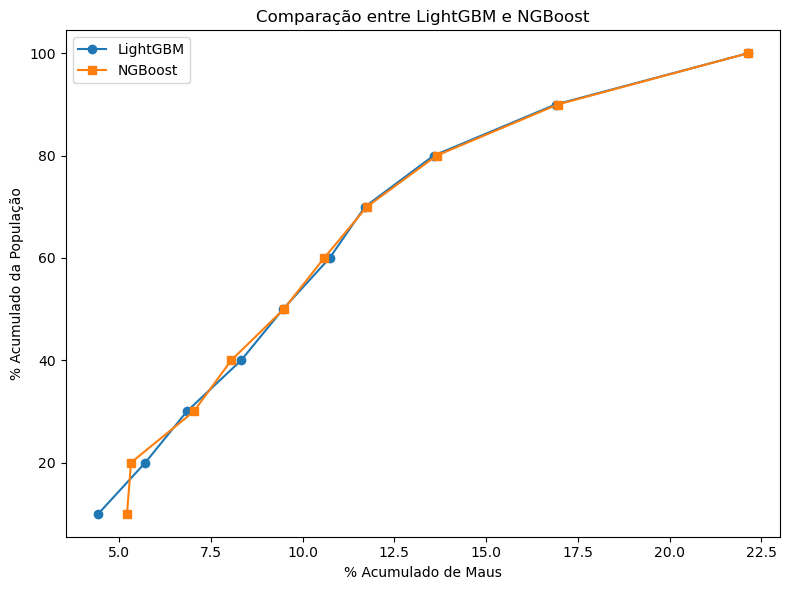

In [15]:
plt.style.use('default')

plt.figure(figsize=(8, 6))

# Plot LGBM
plt.plot(tabela_lgbm['%ACUM_BAD'], tabela_lgbm['%ACUM_POP'], marker='o', label='LightGBM')

# Plot NGBoost
plt.plot(tabela_ngb['%ACUM_BAD'], tabela_ngb['%ACUM_POP'], marker='s', label='NGBoost')

# Eixos
plt.xlabel('% Acumulado de Maus')
plt.ylabel('% Acumulado da População')
plt.title('Comparação entre LightGBM e NGBoost')
plt.legend()
plt.tight_layout()
plt.show()


## COMPARATIVOS E CONSIDERAÇÕES

* DATASET: 30.000 registros e 23 variáveis

| Critério                     | LightGBM                          | NGBoost                              |
| ---------------------------- | --------------------------------- | ------------------------------------ |
| **Tempo de Treinamento (s)** | 1.95 s                            | 121 s (2min 1s)                      |
| **Tempo de Predição (s)**    | 125 ms                            | 1.16 s                               |
| **AUC ROC (val/teste)**      | 0.7766                            | 0.7771                               |
| **KS (val/teste)**           | 42.35                             | 42.16                                |
| **% MAUS (PIOR FAIXA)**      | 43.44%                            | 43.33%                               |
| **% ACUM MAUS (2 MELHORES FAIXAS)**       | 5.72%                | 5.33%                                |
| **Melhor Faixa KS**          | Faixa 2 (KS 42.35)                | Faixa 2 (KS 42.16)                   |
| **Execução em produção**     | ✅ Muito rápida                   | ⚠️ Demorada, pode impactar produção |
| **Interpretação**            | ✅ SHAP, simples de explicar      | ✅ Modela incertezas, mais robusto  |
| **Robustez ao ruído**        | ⚠️ Boa, mas sujeita a overfitting | ✅ Naturalmente mais robusto        |
| **Facilidade de uso**        | ✅ Alta, muito bem documentado    | ⚠️ Requer mais conhecimento técnico  |
| **Ponto Forte**              | Rapidez e eficácia em benchmark   | Incerteza e robustez                 |
| **Ponto Fraco**              | Sensível a overfitting em ruído   | Treinamento lento                    |
| **Observações Gerais**       | Ideal para pipelines rápidos      | Recomendado quando incerteza importa |